# Determining the value of cars
Service for the sale of used cars "Not beat, not painted" develops an application to attract new customers. In it we supposed to quickly find out the market value of your car. We have historical data at your disposal: technical characteristics, equipment and prices of cars. You need to build a model to determine the value.

The customer is interested in:

- quality of prediction;
- speed of prediction;
- training time.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Getting-to-know-the-data" data-toc-modified-id="Getting-to-know-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting to know the data</a></span></li><li><span><a href="#Information-about-Data" data-toc-modified-id="Information-about-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Information about Data</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Working-with-missing-values" data-toc-modified-id="Working-with-missing-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Working with missing values</a></span></li><li><span><a href="#Exploratory-data-analysis,-outliers" data-toc-modified-id="Exploratory-data-analysis,-outliers-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exploratory data analysis, outliers</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Preparing-samples-for-training" data-toc-modified-id="Preparing-samples-for-training-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Preparing samples for training</a></span></li></ul></li><li><span><a href="#Training-models" data-toc-modified-id="Training-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training models</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Decisive-tree-and-random-forest-with-categorical-feature-encoding" data-toc-modified-id="Decisive-tree-and-random-forest-with-categorical-feature-encoding-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Decisive tree and random forest with categorical feature encoding</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Analyzing-models" data-toc-modified-id="Analyzing-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyzing models</a></span><ul class="toc-item"><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model Comparison</a></span></li><li><span><a href="#Verification-on-a-test-sample" data-toc-modified-id="Verification-on-a-test-sample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Verification on a test sample</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

!pip install lightgbm
!pip install catboost

import lightgbm as lgb
from catboost import CatBoostRegressor

import time

import warnings
warnings.filterwarnings('ignore')

## Preparing the data
### Getting to know the data
Loading and exploring the dataset.

In [2]:
try:
    df = pd.read_csv('/datasets/autos.csv')
except:
    df = pd.read_csv('C:/Users/Ivan/datasetsYP/autos.csv')
    
print(df.columns)
display(df.sample(10))
display(df.describe())
display(df.info())
display(df.isnull().sum())
print(df.duplicated().sum())


Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
193903,2016-03-13 18:37:51,1300,small,1999,manual,101,a3,150000,5,petrol,audi,yes,2016-03-13 00:00:00,0,24848,2016-04-06 17:47:05
158062,2016-03-23 16:37:06,12500,suv,2008,manual,136,NaN,80000,8,gasoline,sonstige_autos,no,2016-03-23 00:00:00,0,56332,2016-03-31 21:18:11
339707,2016-03-22 12:56:11,6850,suv,2006,manual,177,rav,150000,3,gasoline,toyota,no,2016-03-22 00:00:00,0,87660,2016-03-29 16:44:56
29547,2016-03-31 13:59:10,3800,small,2006,NaN,0,c3,150000,11,gasoline,citroen,no,2016-03-31 00:00:00,0,28259,2016-04-06 06:44:57
138241,2016-03-05 23:36:46,11450,sedan,2011,manual,140,astra,90000,2,petrol,opel,no,2016-03-05 00:00:00,0,55270,2016-04-06 04:45:38
324198,2016-03-26 10:46:03,1390,sedan,1999,auto,136,vectra,150000,8,petrol,opel,no,2016-03-26 00:00:00,0,82285,2016-03-29 12:46:04
350664,2016-03-29 14:39:08,10000,convertible,2004,auto,163,slk,150000,7,petrol,mercedes_benz,no,2016-03-29 00:00:00,0,71101,2016-04-05 23:47:04
90196,2016-03-12 15:46:32,2222,wagon,2000,manual,136,3er,150000,2,gasoline,bmw,no,2016-03-12 00:00:00,0,47877,2016-03-14 07:44:56
251082,2016-03-17 21:50:44,6350,coupe,2004,auto,165,c_klasse,125000,4,petrol,mercedes_benz,no,2016-03-17 00:00:00,0,66798,2016-03-23 12:15:32
9058,2016-03-12 12:58:01,11690,wagon,2009,manual,170,a6,150000,12,gasoline,audi,no,2016-03-12 00:00:00,0,33178,2016-03-17 12:17:30


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

4


### Information about Data
**References**  
DateCrawled - date when the questionnaire was downloaded from the database  
VehicleType - type of vehicle  
RegistrationYear - the year when the car was registered  
Gearbox - type of gearbox  
Power - power (hp)  
Model - car model  
Kilometer - mileage (km)  
RegistrationMonth - month of vehicle registration  
FuelType - fuel type  
Brand - car brand  
Repaired - whether the car has been repaired or not.  
DateCreated - date of questionnaire creation  
NumberOfPictures - number of photos of the car  
PostalCode - postal code of the questionnaire owner (user)  
LastSeen - date of last activity of the user  
**Target attribute**  
Price - price (euro)  

### Data pre-processing  
Data types:  
DateCrawled, LastSeen, DateCreated - must have a time format  
all int64 data can be converted to int32

In [3]:
print(df.dtypes)    

columns_to_datetime = ['DateCrawled', 'LastSeen', 'DateCreated']
for column in columns_to_datetime:
    df[column] = pd.to_datetime(df[column],
                                format='%Y-%m-%d %H:%M:%S')
    print(f'In column {column}')
    print('Time min:', df[column].min())
    print('Time miax:', df[column].max())

column_int64_to_34 = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
df = df.astype(column_int64_to_34)

print('\n\nAfter datatype interconversion\n\n', df.dtypes)

DateCrawled          object
Price                 int64
VehicleType          object
RegistrationYear      int64
Gearbox              object
Power                 int64
Model                object
Kilometer             int64
RegistrationMonth     int64
FuelType             object
Brand                object
Repaired             object
DateCreated          object
NumberOfPictures      int64
PostalCode            int64
LastSeen             object
dtype: object
In column DateCrawled
Time min: 2016-03-05 14:06:22
Time miax: 2016-04-07 14:36:58
In column LastSeen
Time min: 2016-03-05 14:15:08
Time miax: 2016-04-07 14:58:51
In column DateCreated
Time min: 2014-03-10 00:00:00
Time miax: 2016-04-07 00:00:00


After datatype interconversion

 DateCrawled          datetime64[ns]
Price                         int32
VehicleType                  object
RegistrationYear              int32
Gearbox                      object
Power                         int32
Model                        object
Kilom

4 complete duplicates were found in the data - they can be deleted.  
In the column with photos, all the value 0 - delete.  
Most likely, uninformative columns are the ones with information about the mailing address of the owner of the questionnaire (although for the USA it is not always true), also, probably, the month of registration does not matter. 
Data on the time the questionnaire was uploaded, the date the questionnaire was created, and the date of last user activity might be interesting, but the period for which the data are collected is very short (two months), so these columns are uninformative.  
It could be interesting to get a new feature with the time from publication to uploading (cheap offers should be sorted out quickly, hence, the more time passes from the publication of an advertisement, the less attractive the price will be on average), but such observations require a longer period of time. 
Since the efficiency of the model is important for the customer, let us remember these probably unnecessary features and check whether they are needed on a simple model in the future.

In [4]:
df = df.drop_duplicates()
print(df.duplicated().sum())

to_drop_columns = ['DateCrawled', 'DateCreated', 'LastSeen', 'NumberOfPictures']


may_be_to_drop_columns = ['RegistrationMonth', 'PostalCode']

df = df.drop(to_drop_columns, axis=1)
display(df.info())

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              354365 non-null  int32 
 1   VehicleType        316875 non-null  object
 2   RegistrationYear   354365 non-null  int32 
 3   Gearbox            334532 non-null  object
 4   Power              354365 non-null  int32 
 5   Model              334660 non-null  object
 6   Kilometer          354365 non-null  int32 
 7   RegistrationMonth  354365 non-null  int32 
 8   FuelType           321470 non-null  object
 9   Brand              354365 non-null  object
 10  Repaired           283211 non-null  object
 11  PostalCode         354365 non-null  int32 
dtypes: int32(6), object(6)
memory usage: 27.0+ MB


None

### Working with missing values
Let's check where there are missing values and how many rows with multiple missing values.  
Remove rows with more than 3 missing values.

In [5]:
display(df.isnull().sum())

for i in range(0, 5, 1):
    print(f'Raws with {i} and more NaN(%):',100*((df.isna().sum(axis=1) >= i).sum())/(len(df)), '\n')
    
mask_rows_with_3_or_more_nans = df.isna().sum(axis=1) < 3
df = df[mask_rows_with_3_or_more_nans]

Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
PostalCode               0
dtype: int64

Raws with 0 and more NaN(%): 100.0 

Raws with 1 and more NaN(%): 30.63366867495379 

Raws with 2 and more NaN(%): 12.48345632328249 

Raws with 3 and more NaN(%): 5.087409873999972 

Raws with 4 and more NaN(%): 2.263203194446404 



**VehicleType** For categorical variables with a large number of values, we fill in the blanks with the unknown value

In [6]:
def infromation_about_values_and_nans(column_name):
    print(df[column_name].unique())
    print(df[column_name].value_counts())
    print('NaN values:', df[column_name].isna().sum())
    print('NaN values to total values (%):', 100*df[column_name].isna().sum()/(df[column_name].count() 
                                                                      + df[column_name].isna().sum()))
    return

infromation_about_values_and_nans('VehicleType')
df['VehicleType'] = df['VehicleType'].fillna('unknown')

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
sedan          90870
small          79058
wagon          64682
bus            28570
convertible    20010
coupe          15993
suv            11896
other           3136
Name: VehicleType, dtype: int64
NaN values: 22122
NaN values to total values (%): 6.577331664372341


**Gearbox** Since we have only 2 values in the gearbox information - automatic and manual, and the concept of unknown is not very suitable for this, let's encode the values with two Boolean columns.

In [7]:
infromation_about_values_and_nans('Gearbox')
df['Gearbox_auto'] = df['Gearbox'].apply(lambda x: True if x == 'auto' else False)
df['Gearbox_manual'] = df['Gearbox'].apply(lambda x: True if x == 'manual' else False)
df = df.drop('Gearbox', axis=1)

['manual' 'auto' nan]
manual    262287
auto       65096
Name: Gearbox, dtype: int64
NaN values: 8954
NaN values to total values (%): 2.662210818316153


**Model** For models we will also introduce a new category - unknown

In [8]:
infromation_about_values_and_nans('Model')
df['Model'] = df['Model'].fillna('unknown')

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva'
 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'kangoo' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8' 'jetta'
 'polo' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156' 'escort'
 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'combo' 'focus' 'tt' 'corsa'
 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'z_reihe' 'sportage' 'sorento'
 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'insignia' 'a3' 'almera'
 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'sharan' '6_reihe'
 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'rio' 'touareg' 'logan'
 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse' '1_reihe'
 'avensis' 'roomster' 'sl' 'kaefer' 'santa' 'cooper' 'leon' '4_reihe' 'a5'
 '500' '

**FuelType** Fill up with unknown

In [9]:
infromation_about_values_and_nans('FuelType')
df['FuelType'] = df['FuelType'].fillna('unknown')

['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
petrol      213684
gasoline     97813
lpg           5254
cng            561
hybrid         230
other          169
electric        86
Name: FuelType, dtype: int64
NaN values: 18540
NaN values to total values (%): 5.512328408709122


**repaired** There are missing values in the column with the mended information, we can assume that these are unmapped no values.  Also, to simplify model training, you can replace this column with a column with the same information of Boolean type.  

In [10]:
infromation_about_values_and_nans('Repaired')

df['Repaired'] = df['Repaired'].fillna('no')
print(df['Repaired'].unique())

df['repaired_boolin'] = df['Repaired'].apply(lambda x: True if x == 'yes' else False)
df = df.drop('Repaired', axis=1)
print(df['repaired_boolin'].value_counts())

df.info()

[nan 'yes' 'no']
no     245743
yes     35490
Name: Repaired, dtype: int64
NaN values: 55104
NaN values to total values (%): 16.383567671710217
['no' 'yes']
False    300847
True      35490
Name: repaired_boolin, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 336337 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              336337 non-null  int32 
 1   VehicleType        336337 non-null  object
 2   RegistrationYear   336337 non-null  int32 
 3   Power              336337 non-null  int32 
 4   Model              336337 non-null  object
 5   Kilometer          336337 non-null  int32 
 6   RegistrationMonth  336337 non-null  int32 
 7   FuelType           336337 non-null  object
 8   Brand              336337 non-null  object
 9   PostalCode         336337 non-null  int32 
 10  Gearbox_auto       336337 non-null  bool  
 11  Gearbox_manual     336337 non-null  

### Exploratory data analysis, outliers
The following columns (in addition to those deleted with dates and number of photos) were explored during pre-processing:

In [11]:
categoral_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']
boolin_column = ['repaired_boolin']
print(categoral_columns+boolin_column)

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'repaired_boolin']


The following columns remain to be considered:

In [12]:
quantitative_column_list = ['Price', 'RegistrationYear', 'RegistrationMonth', 'PostalCode',
                            'Power', 'Kilometer']
print(quantitative_column_list)

['Price', 'RegistrationYear', 'RegistrationMonth', 'PostalCode', 'Power', 'Kilometer']


**Price** No outliers noticed, there is a group of great prices, but they are adequately large.

count    336337.000000
mean       4553.640272
std        4543.565743
min           0.000000
25%        1199.000000
50%        2899.000000
75%        6500.000000
max       20000.000000
Name: Price, dtype: float64

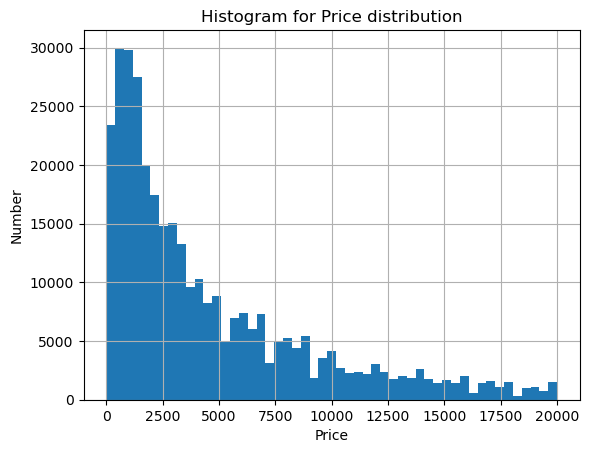

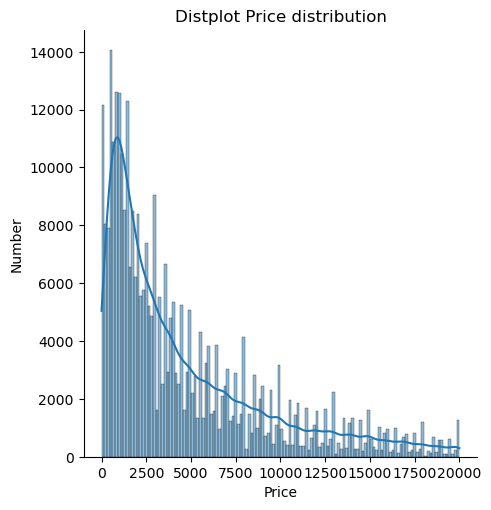

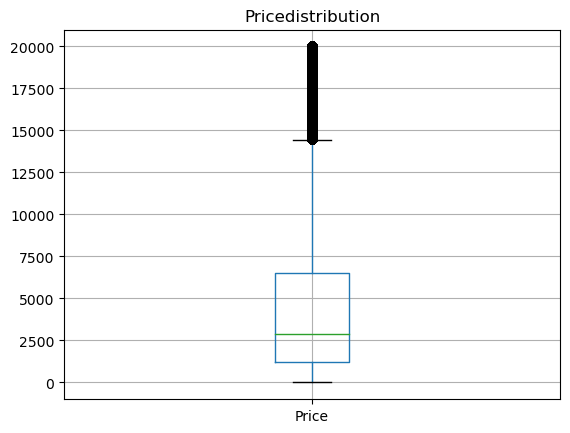

In [13]:
def analysis_of_quntitative_parametr(name):
    display(df[name].describe())

    df[name].hist(bins = 51)
    plt.title(label=f'Histogram for {name} distribution', loc='center')
    plt.xlabel(f"{name}")
    plt.ylabel("Number")
    plt.show()
    
    sns.displot(df[name], kde=True)
    plt.title(label=f'Distplot {name} distribution', loc='center')
    plt.xlabel(f"{name}")
    plt.ylabel("Number")
    plt.show()

    df.boxplot(column=name)
    plt.title(label=f'{name}distribution', loc='center')
    plt.show()
    
    return

analysis_of_quntitative_parametr('Price')



**'RegistrationYear', 'RegistrationMonth'** The registration months are evenly distributed, but there are clearly outliers in the registration years. The limit at the top would be 2017 (since listings are posted through 2016-04-07). The year of issue is less than 1950 only for 96 columns, so we can remove them.
Since in principle the information about the year and month of registration is one information - about the time of registration, let's combine these columns into one column according to the following principle: year * 100 + (month - 1) * 100 / 12
This will allow us to get rid of one column, saving all the data and clarify the time of registration.

count    336337.000000
mean       2003.125898
std          25.526342
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        9000.000000
Name: RegistrationYear, dtype: float64

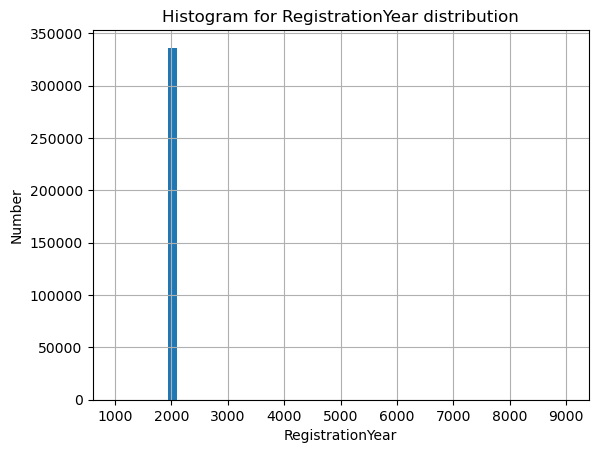

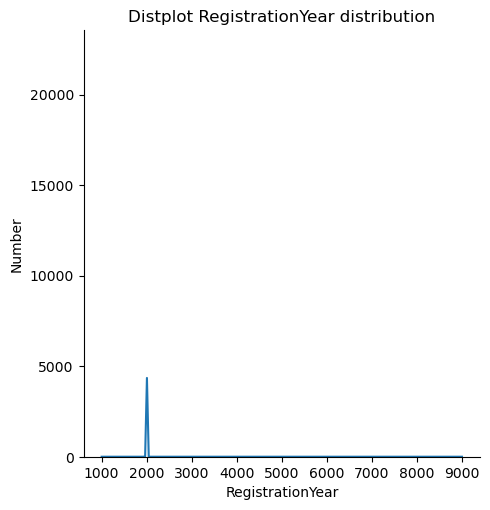

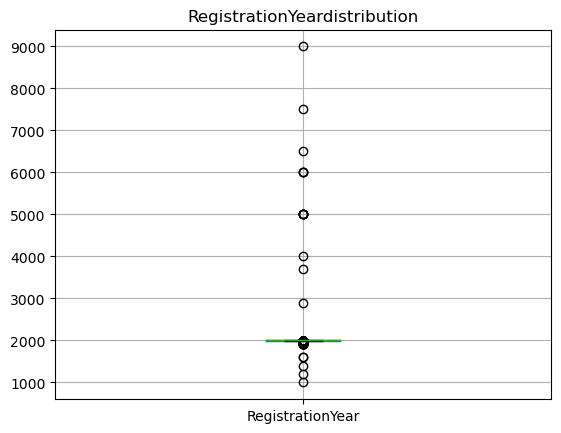

count    336337.000000
mean          5.880192
std           3.650625
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: RegistrationMonth, dtype: float64

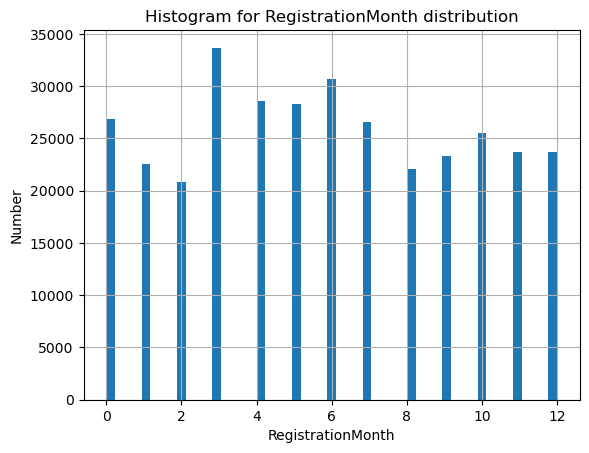

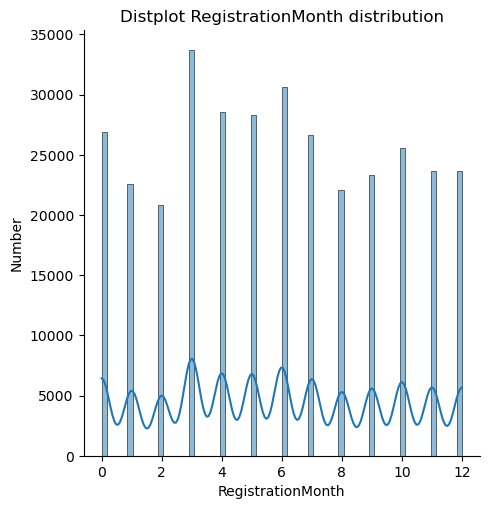

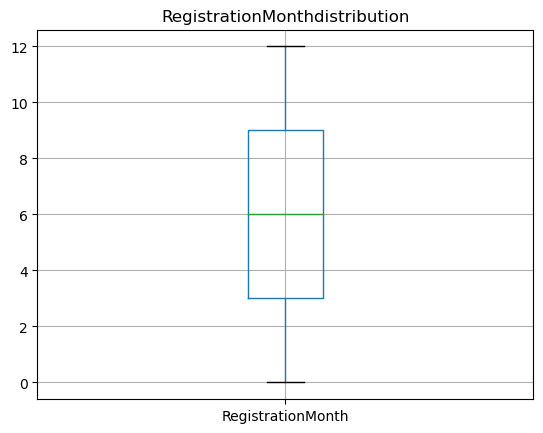

,Price,VehicleType,RegistrationYear,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,PostalCode,Gearbox_auto,Gearbox_manual,repaired_boolin
15,450,small,1910,0,ka,5000,0,petrol,ford,24148,False,False,False
1928,7000,suv,1945,48,other,150000,2,petrol,volkswagen,58135,False,True,False
16635,9500,suv,1941,57,unknown,40000,1,petrol,sonstige_autos,59557,False,True,False
22621,14000,sedan,1929,30,unknown,5000,7,petrol,sonstige_autos,90475,False,True,False
23750,3900,wagon,1910,90,passat,150000,0,petrol,volkswagen,88662,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336104,20000,coupe,1929,12,other,10000,4,petrol,bmw,74523,False,True,False
338109,7000,coupe,1937,85,other,5000,8,petrol,ford,8359,False,True,True
340759,700,unknown,1600,1600,a3,150000,4,petrol,audi,86343,False,True,False
346046,18900,suv,1943,60,other,150000,3,petrol,volkswagen,51065,False,True,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 325781 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              325781 non-null  int32 
 1   VehicleType        325781 non-null  object
 2   Power              325781 non-null  int32 
 3   Model              325781 non-null  object
 4   Kilometer          325781 non-null  int32 
 5   FuelType           325781 non-null  object
 6   Brand              325781 non-null  object
 7   PostalCode         325781 non-null  int32 
 8   Gearbox_auto       325781 non-null  bool  
 9   Gearbox_manual     325781 non-null  bool  
 10  repaired_boolin    325781 non-null  bool  
 11  registration_time  325781 non-null  int32 
dtypes: bool(3), int32(5), object(4)
memory usage: 19.6+ MB


count    325781.000000
mean     200296.238995
std         662.072871
min      195091.000000
25%      199916.000000
50%      200316.000000
75%      200741.000000
max      201691.000000
Name: registration_time, dtype: float64

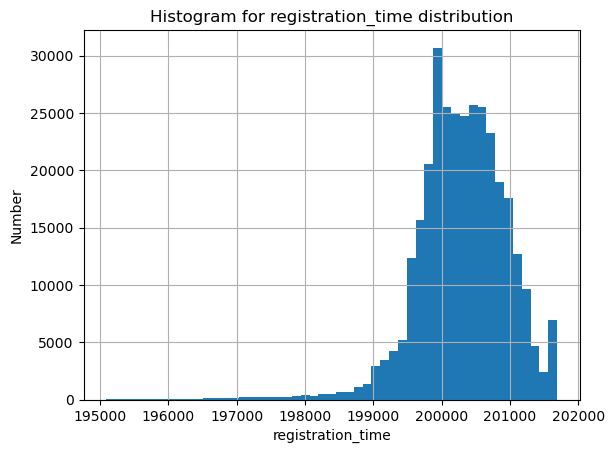

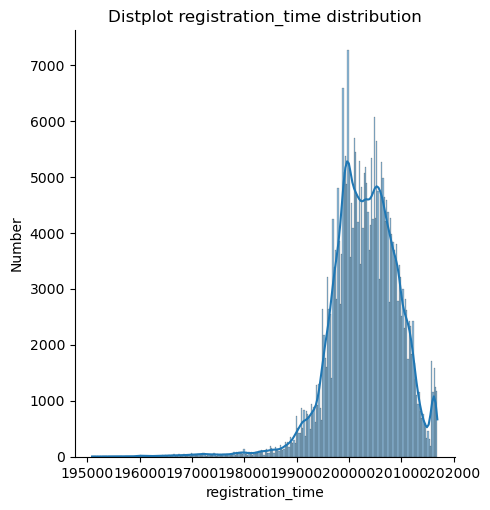

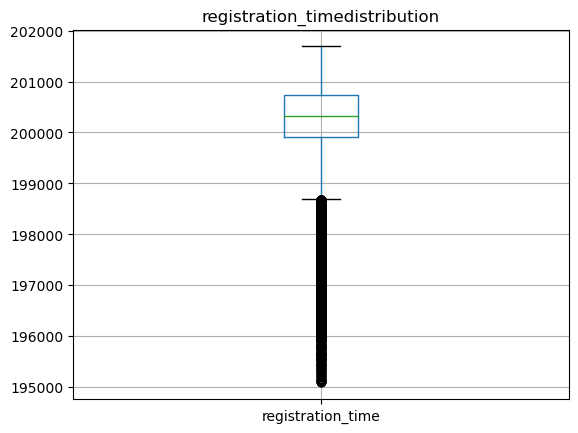

In [14]:
analysis_of_quntitative_parametr('RegistrationYear')
analysis_of_quntitative_parametr('RegistrationMonth')

display(df.loc[df['RegistrationYear'] < 1950])
df = df.loc[((df['RegistrationYear'] > 1950) & (df['RegistrationYear'] < 2017))]

df['registration_time'] = df['RegistrationYear'] * 100 + (100 * (df['RegistrationMonth'] - 1) // 12)
df = df.drop('RegistrationYear', axis=1)
df = df.drop('RegistrationMonth', axis=1)
df.info()
analysis_of_quntitative_parametr('registration_time')

**'PostalCode'** something between quantitative and qualitative. All values are in the possible range, so let's leave it as it is for now.

count    325781.000000
mean      50724.605803
std       25788.347354
min        1067.000000
25%       30449.000000
50%       49593.000000
75%       71332.000000
max       99998.000000
Name: PostalCode, dtype: float64

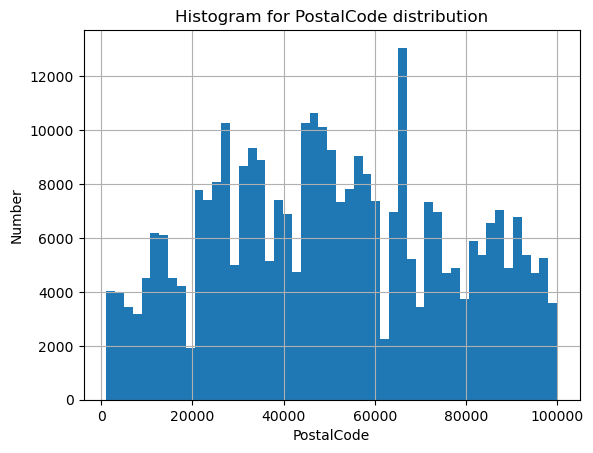

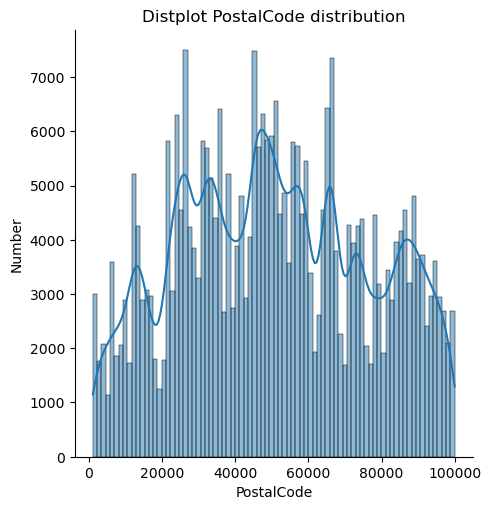

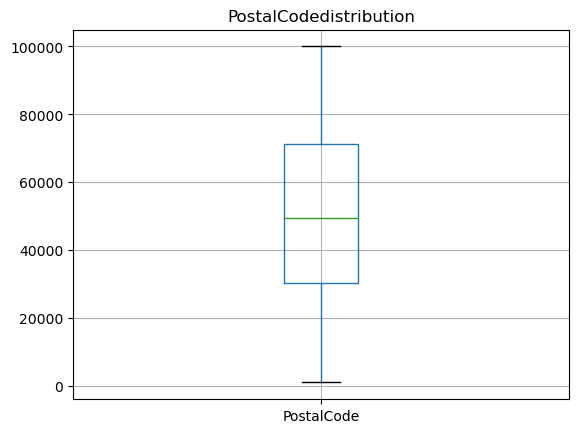

In [15]:
analysis_of_quntitative_parametr('PostalCode')

**'Power'** While the zero values are reasonable (selling a car without an engine), the upper emissions are clearly emissions. There is no obvious transition to larger values, also difficult to determine if values are multiplied by 10. So we will discard values greater than 500.

count    325781.000000
mean        113.921524
std         187.256004
min           0.000000
25%          75.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

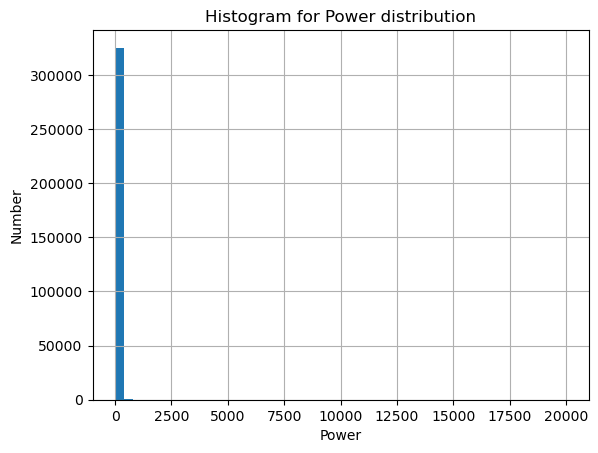

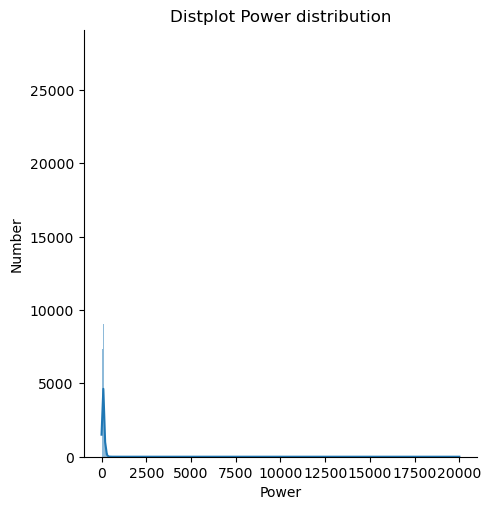

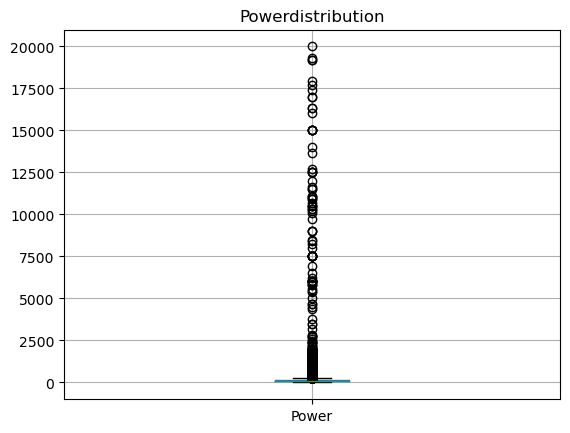

Number of cars with Power > 250: 7109
Number of cars with Power > 500: 395
Number of cars with Power > 750: 296
Number of cars with Power > 1000: 266
Number of cars with Power > 1250: 216
Number of cars with Power > 1500: 179
Number of cars with Power > 1750: 144
Number of cars with Power > 2000: 104
Number of cars with Power > 2250: 92
Number of cars with Power > 2500: 87


count    325354.000000
mean        110.338453
std          61.179618
min           0.000000
25%          75.000000
50%         105.000000
75%         143.000000
max         490.000000
Name: Power, dtype: float64

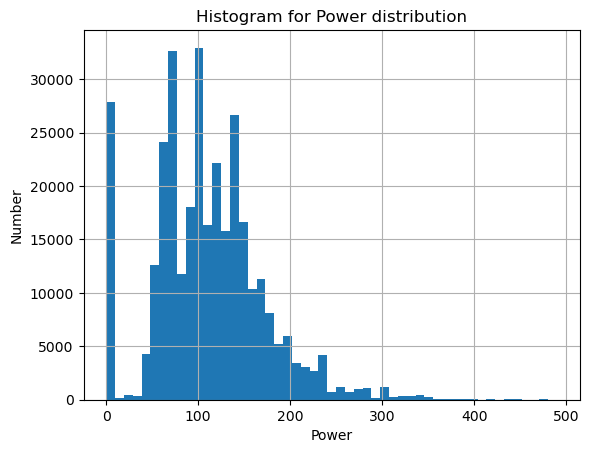

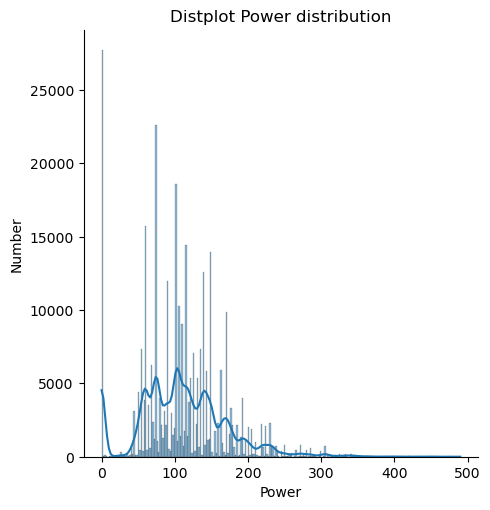

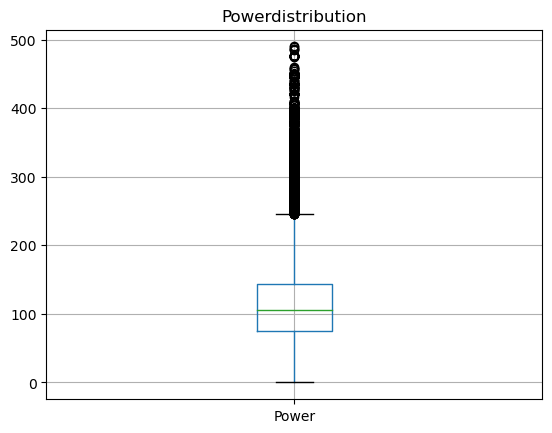

In [16]:
analysis_of_quntitative_parametr('Power')
for i in range(250, 2501, 250):
    print(f'Number of cars with Power > {i}:', len(df.loc[df['Power'] > i]))
    
df = df.loc[(df['Power'] < 500)]
analysis_of_quntitative_parametr('Power')

**'Kilometer'** The main question about kilometers is why 50% of values is exactly 150000? There are probably some problems with data entry. This column may have to be deleted altogether....

count    325354.000000
mean     128610.989876
std       36921.947123
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64

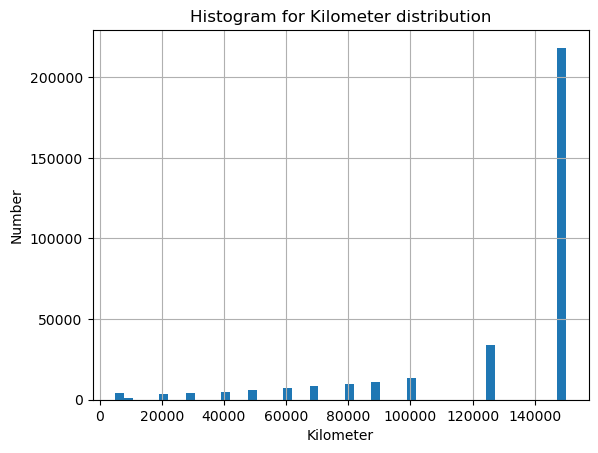

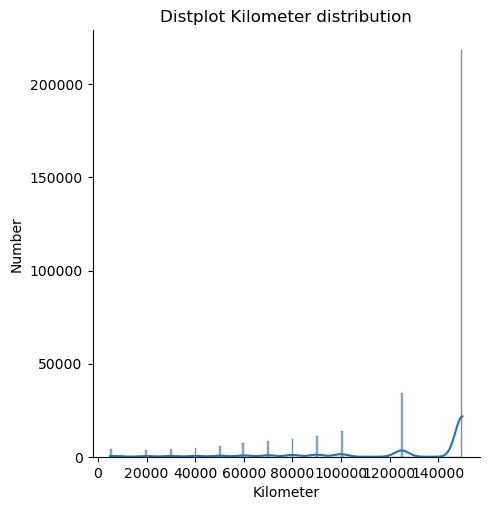

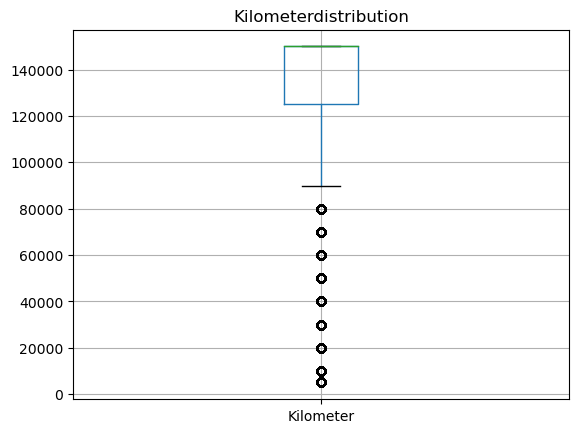

In [17]:
analysis_of_quntitative_parametr('Kilometer')
may_be_to_drop_columns = ['Kilometer', 'PostalCode']

#### Conclusions
The original dataset size was 43.3+ MB, after removing uninformative features and working with types the dataset size was: 19.5+ MB.  
Data were examined, duplicates and outliers were removed.  Work was done on missing values. Uninformative columns were removed. Data types were reduced to less voluminous data. For this purpose also 2 categorical features were converted to boolean features.

In [18]:
print('Remain values (%):', 100 * 325354 / 354369)
print(df.columns)
display(df.sample(10).T)
display(df.describe())
display(df.info())
display(df.isnull().sum())

Remain values (%): 91.81220704971372
Index(['Price', 'VehicleType', 'Power', 'Model', 'Kilometer', 'FuelType',
       'Brand', 'PostalCode', 'Gearbox_auto', 'Gearbox_manual',
       'repaired_boolin', 'registration_time'],
      dtype='object')


,194697,277372,236572,99621,131056,10235,120351,314571,345243,334378
Price,15600,6250,14000,2099,1432,9550,2900,4250,8800,699
VehicleType,wagon,wagon,sedan,small,wagon,wagon,small,bus,wagon,small
Power,435,105,75,60,150,163,50,69,117,60
Model,other,astra,unknown,lupo,laguna,3er,fortwo,caddy,other,corsa
Kilometer,150000,60000,20000,150000,150000,20000,90000,70000,125000,70000
FuelType,petrol,petrol,petrol,petrol,gasoline,gasoline,petrol,gasoline,petrol,petrol
Brand,audi,opel,sonstige_autos,volkswagen,renault,bmw,smart,volkswagen,chevrolet,opel
PostalCode,99974,91757,59557,70794,87509,44369,37079,73479,86751,20535
Gearbox_auto,True,False,False,False,False,False,False,False,True,False
Gearbox_manual,False,True,True,True,True,True,True,True,False,True


,Price,Power,Kilometer,PostalCode,registration_time
count,325354.000000,325354.000000,325354.000000,325354.000000,325354.000000
mean,4591.133731,110.338453,128610.989876,50730.765136,200296.315324
std,4563.609958,61.179618,36921.947123,25788.545134,662.014405
min,0.000000,0.000000,5000.000000,1067.000000,195091.000000
25%,1200.000000,75.000000,125000.000000,30449.000000,199916.000000
50%,2900.000000,105.000000,150000.000000,49596.000000,200316.000000
75%,6650.000000,143.000000,150000.000000,71332.000000,200741.000000
max,20000.000000,490.000000,150000.000000,99998.000000,201691.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 325354 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              325354 non-null  int32 
 1   VehicleType        325354 non-null  object
 2   Power              325354 non-null  int32 
 3   Model              325354 non-null  object
 4   Kilometer          325354 non-null  int32 
 5   FuelType           325354 non-null  object
 6   Brand              325354 non-null  object
 7   PostalCode         325354 non-null  int32 
 8   Gearbox_auto       325354 non-null  bool  
 9   Gearbox_manual     325354 non-null  bool  
 10  repaired_boolin    325354 non-null  bool  
 11  registration_time  325354 non-null  int32 
dtypes: bool(3), int32(5), object(4)
memory usage: 19.5+ MB


None

Price                0
VehicleType          0
Power                0
Model                0
Kilometer            0
FuelType             0
Brand                0
PostalCode           0
Gearbox_auto         0
Gearbox_manual       0
repaired_boolin      0
registration_time    0
dtype: int64

### Preparing samples for training

In [19]:
print('May be will drop:', may_be_to_drop_columns)

categoral_columns = ['VehicleType', 'Model', 'FuelType', 'Brand']
boolin_column = ['repaired_boolin', 'Gearbox_manual', 'Gearbox_auto']
quantitative_column_list = ['PostalCode', 'Power', 'Kilometer', 'registration_time']
quantitative_and_boolin_column_list = boolin_column + quantitative_column_list
quantitative_and_boolin_column_list_no_postal_index = ['repaired_boolin', 'Gearbox_manual', 'Gearbox_auto',
                                                       'Power', 'Kilometer', 'registration_time']

print('Categoral parametrs:', categoral_columns)
print('Boolean parametrs:', boolin_column)
print('Quantitative parametrs:', quantitative_column_list)


def split_all_the_stuff(df):
    df_features = df.drop(['Price'], axis=1)
    df_targets = df['Price']

    train_and_valid_features, test_features = train_test_split(df_features, test_size=0.20, random_state=44)
    train_features, valid_features =  train_test_split(train_and_valid_features,
                                                         test_size=0.25, random_state=44)

    train_and_valid_targets, test_targets = train_test_split(df_targets, test_size=0.20, random_state=44)
    train_targets, valid_targets =  train_test_split(train_and_valid_targets, 
                                                       test_size=0.25, random_state=44)
    return test_features, train_features, valid_features, test_targets, train_targets, valid_targets

test_features, train_features, valid_features, test_targets, train_targets, valid_targets = split_all_the_stuff(df)

display(train_features.sample(5))
display(valid_targets.sample(5))

May be will drop: ['Kilometer', 'PostalCode']
Categoral parametrs: ['VehicleType', 'Model', 'FuelType', 'Brand']
Boolean parametrs: ['repaired_boolin', 'Gearbox_manual', 'Gearbox_auto']
Quantitative parametrs: ['PostalCode', 'Power', 'Kilometer', 'registration_time']


,VehicleType,Power,Model,Kilometer,FuelType,Brand,PostalCode,Gearbox_auto,Gearbox_manual,repaired_boolin,registration_time
24517,wagon,105,focus,150000,gasoline,ford,40235,False,True,False,201275
216499,convertible,54,fortwo,30000,petrol,smart,53332,True,False,False,200283
109925,small,174,clubman,100000,petrol,mini,83533,False,True,False,200691
239739,coupe,125,unknown,150000,petrol,honda,47533,False,True,False,199616
185333,sedan,90,astra,150000,petrol,opel,82490,False,True,False,200525


253304    15490
266875     2500
321905     3450
223282     3800
127963     2590
Name: Price, dtype: int32

## Training models
It is necessary to train several models, in particular, LightGBM with hyperparameter selection.  It is important to consider training time and prediction time. The metric used is RMSE, which should be less than 2500.
### Preparation
Let's create a list of models for further analysis, a function to write to it, a function for RMSE, and see how the dummy model copes.

In [20]:
model_list = pd.DataFrame({
                    'model_name': [],
                    'data_name': [],
                    'rmse': [],
                    'comments': [],
                    'model': [],
                    'learning_time': [],
                    'prediction_time': []
})

def give_me_RMSE(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared = False)


def append_model_list(model_name, data_name, rmse, comment, best_model, learning_time, prediction_time):
    global model_list
    new_row = {'model_name': model_name, 'data_name': data_name, 'rmse': rmse,
               'comments': comment, 'model': best_model,
              'learning_time': learning_time, 'prediction_time': prediction_time}
    display(new_row)
    model_list = model_list.append(new_row, ignore_index=True)

In [21]:
%%time
def dummy_predictions(features, targets, valid_features, valid_targets, data_name):
    dummy_regr = DummyRegressor(strategy="mean")
    
    start = time.time()
    dummy_regr.fit(features, targets)
    end = time.time()
    learning_time = end - start
    
    start = time.time()
    dummy_predictions = dummy_regr.predict(valid_features)
    end = time.time()
    prediction_time = end - start
    
    dummy_rmse = give_me_RMSE(valid_targets, dummy_predictions)
    
    comment = ''
    append_model_list('DummyModel', data_name, dummy_rmse, comment, 
                      dummy_regr, learning_time, prediction_time)
    print(f'rmse for {data_name} with dummy model: {dummy_rmse}')
    return

dummy_predictions(train_features, train_targets, valid_features, valid_targets,
                  'quant&bool')


{'model_name': 'DummyModel',
 'data_name': 'quant&bool',
 'rmse': 4564.36612924087,
 'comments': '',
 'model': DummyRegressor(),
 'learning_time': 0.0010068416595458984,
 'prediction_time': 0.0}

rmse for quant&bool with dummy model: 4564.36612924087
CPU times: total: 0 ns
Wall time: 9.92 ms


Mean value predicts price not so bad, what about linear regression on quantitative and Boolean features only?
### Linear regression

In [22]:
%%time
def linear_regression_model(features, targets, valid_features, valid_targets, data_name):
    
    model = model = LinearRegression()
    
    start = time.time()
    model.fit(features, targets)
    end = time.time()
    learning_time = end - start
    
    start = time.time()
    predictions = model.predict(valid_features)
    end = time.time()
    prediction_time = end - start
    
    rmse = give_me_RMSE(valid_targets, predictions)
    
    comment = ''
    
    append_model_list('LinearRegression', data_name, rmse, comment, model, learning_time, prediction_time)
    print(f'rmse for linear regression with {data_name}: {rmse}')
    return

linear_regression_model(train_features[quantitative_and_boolin_column_list],
                        train_targets, valid_features[quantitative_and_boolin_column_list],
                        valid_targets, 'quant&bool')
linear_regression_model(train_features[quantitative_and_boolin_column_list_no_postal_index],
                        train_targets, valid_features[quantitative_and_boolin_column_list_no_postal_index],
                        valid_targets, 'quant&bool_no_post_index')



{'model_name': 'LinearRegression',
 'data_name': 'quant&bool',
 'rmse': 3189.568691930844,
 'comments': '',
 'model': LinearRegression(),
 'learning_time': 0.04752039909362793,
 'prediction_time': 0.004647493362426758}

rmse for linear regression with quant&bool: 3189.568691930844


{'model_name': 'LinearRegression',
 'data_name': 'quant&bool_no_post_index',
 'rmse': 3192.4364733973116,
 'comments': '',
 'model': LinearRegression(),
 'learning_time': 0.045952558517456055,
 'prediction_time': 0.005000591278076172}

rmse for linear regression with quant&bool_no_post_index: 3192.4364733973116
CPU times: total: 562 ms
Wall time: 123 ms


Linear regression shows significantly better results, which is disappointing.
### Decision Tree
Let's turn to the decision tree model with a small selection of hyperparameters.

In [23]:
%%time
def tree_optimization(features, targets, valid_features, valid_targets, data_name):
    best_model = None
    best_rmse = 100_000_000
    best_depth = 0
    best_learning_time, best_prediction_time = 0, 0
    
    for depth in range(1, 17, 5):
        model = DecisionTreeRegressor(max_depth = depth, random_state = 44)
        
        start = time.time()
        model.fit(features, targets)
        end = time.time()
        learning_time = end - start
        
        start = time.time()
        predictions = model.predict(valid_features)
        end = time.time()
        prediction_time = end - start
    
        rmse = give_me_RMSE(valid_targets, predictions)
        
    
        print(f'Tree with {data_name}, depth = {depth}, rmse = {rmse}\n',
             f'learning time = {learning_time}, prediction time = {prediction_time}\n\n')

        if rmse < best_rmse:
            best_model = model
            best_rmse = rmse
            best_depth = depth
            best_learning_time = learning_time
            best_prediction_time = prediction_time
    
    comment = f'depth = {best_depth}'
    append_model_list('Tree', data_name, best_rmse, comment, best_model, best_learning_time,
                      best_prediction_time)
    print(f'rmse for tree with {data_name}: {best_rmse}')    
    return

tree_optimization(train_features[quantitative_and_boolin_column_list], train_targets,
                  valid_features[quantitative_and_boolin_column_list], valid_targets,
                  'quant&bool')

tree_optimization(train_features[quantitative_and_boolin_column_list_no_postal_index],
                        train_targets, valid_features[quantitative_and_boolin_column_list_no_postal_index],
                        valid_targets, 'quant&bool_no_post_index')

Tree with quant&bool, depth = 1, rmse = 3617.768858516914
 learning time = 0.06064581871032715, prediction time = 0.00432276725769043


Tree with quant&bool, depth = 6, rmse = 2372.757395228595
 learning time = 0.2941603660583496, prediction time = 0.006263017654418945


Tree with quant&bool, depth = 11, rmse = 2186.88431447786
 learning time = 0.45681047439575195, prediction time = 0.009001493453979492


Tree with quant&bool, depth = 16, rmse = 2353.4252104235616
 learning time = 0.6091780662536621, prediction time = 0.014009237289428711




{'model_name': 'Tree',
 'data_name': 'quant&bool',
 'rmse': 2186.88431447786,
 'comments': 'depth = 11',
 'model': DecisionTreeRegressor(max_depth=11, random_state=44),
 'learning_time': 0.45681047439575195,
 'prediction_time': 0.009001493453979492}

rmse for tree with quant&bool: 2186.88431447786
Tree with quant&bool_no_post_index, depth = 1, rmse = 3617.768858516914
 learning time = 0.03434276580810547, prediction time = 0.004001140594482422


Tree with quant&bool_no_post_index, depth = 6, rmse = 2372.729903982799
 learning time = 0.16097092628479004, prediction time = 0.0050013065338134766


Tree with quant&bool_no_post_index, depth = 11, rmse = 2187.8104709872846
 learning time = 0.2539503574371338, prediction time = 0.00825357437133789


Tree with quant&bool_no_post_index, depth = 16, rmse = 2276.5821542520885
 learning time = 0.3344902992248535, prediction time = 0.013041019439697266




{'model_name': 'Tree',
 'data_name': 'quant&bool_no_post_index',
 'rmse': 2187.8104709872846,
 'comments': 'depth = 11',
 'model': DecisionTreeRegressor(max_depth=11, random_state=44),
 'learning_time': 0.2539503574371338,
 'prediction_time': 0.00825357437133789}

rmse for tree with quant&bool_no_post_index: 2187.8104709872846
CPU times: total: 3.23 s
Wall time: 2.29 s


The decision tree on quantitative and Boolean features only showed excellent results, which are already within the customer's expectations. The postal code does not affect the quality of the model, as in the case of linear regression. Therefore, we will exclude it from the attributes.

In [24]:
df = df.drop('PostalCode', axis=1)

print(categoral_columns)
print(quantitative_and_boolin_column_list_no_postal_index)

['VehicleType', 'Model', 'FuelType', 'Brand']
['repaired_boolin', 'Gearbox_manual', 'Gearbox_auto', 'Power', 'Kilometer', 'registration_time']


### Random forest

In [25]:
%%time
def forest_optimization(features, targets, valid_features, valid_targets, data_name):
    best_model = None
    best_rmse = 100_000_000
    best_depth, best_est_forest = 0, 0
    best_learning_time, best_prediction_time = 0, 0
    
    for est in range(2, 43, 20):
        print('Number of tress:', est)
        
        for depth in range(1, 17, 5):
            model = RandomForestRegressor(random_state = 44, n_estimators=est, max_depth=depth)
        
            start = time.time()
            model.fit(features, targets)
            end = time.time()
            learning_time = end - start
        
            start = time.time()
            predictions = model.predict(valid_features)
            end = time.time()
            prediction_time = end - start
    
            rmse = give_me_RMSE(valid_targets, predictions)
        
    
            print(f'Forest with {data_name}, depth = {depth}, rmse = {rmse}\n',
             f'learning time = {learning_time}, prediction time = {prediction_time}\n\n')

            if rmse < best_rmse:
                best_model = model
                best_rmse = rmse
                best_depth = depth
                best_est_forest = est
                best_learning_time = learning_time
                best_prediction_time = prediction_time

    comment = f'depth = {best_depth}, ammount of trees = {best_est_forest}'
    append_model_list('Forest', data_name, best_rmse, comment, best_model,
                      best_learning_time, best_prediction_time)
    print(f'rmse for forest with {data_name}: {best_rmse}')    
    return

forest_optimization(train_features[quantitative_and_boolin_column_list_no_postal_index], train_targets,
                  valid_features[quantitative_and_boolin_column_list_no_postal_index], valid_targets,
                  'quant&bool_no_post_index')

Number of tress: 2
Forest with quant&bool_no_post_index, depth = 1, rmse = 3617.7030878128435
 learning time = 0.059816837310791016, prediction time = 0.00499415397644043


Forest with quant&bool_no_post_index, depth = 6, rmse = 2360.529733873087
 learning time = 0.24655508995056152, prediction time = 0.009019613265991211


Forest with quant&bool_no_post_index, depth = 11, rmse = 2186.389438323903
 learning time = 0.37860584259033203, prediction time = 0.014943361282348633


Forest with quant&bool_no_post_index, depth = 16, rmse = 2246.616051515628
 learning time = 0.5158894062042236, prediction time = 0.025212526321411133


Number of tress: 22
Forest with quant&bool_no_post_index, depth = 1, rmse = 3605.576483034951
 learning time = 0.613983154296875, prediction time = 0.021716594696044922


Forest with quant&bool_no_post_index, depth = 6, rmse = 2333.4559343937976
 learning time = 2.581584930419922, prediction time = 0.0656430721282959


Forest with quant&bool_no_post_index, depth = 

{'model_name': 'Forest',
 'data_name': 'quant&bool_no_post_index',
 'rmse': 2081.905641718128,
 'comments': 'depth = 16, ammount of trees = 42',
 'model': RandomForestRegressor(max_depth=16, n_estimators=42, random_state=44),
 'learning_time': 9.54158067703247,
 'prediction_time': 0.3868234157562256}

rmse for forest with quant&bool_no_post_index: 2081.905641718128
CPU times: total: 38.5 s
Wall time: 38.6 s


Random forest showed the best results, and that's without considering categorical traits.

### Decisive tree and random forest with categorical feature encoding
Now, it is important to try to train the models on all features. First we need to perform the encoding. The amount of data is too large, so we apply OrdinalEncoder.

In [26]:
print(categoral_columns, '\n')

for column in categoral_columns:
    print(column, df[column].nunique(), '\n')

    
def encode_column_and_give(test_f, train_f, valid_f):
    for column in categoral_columns:
        ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        train_f[f'{column}_encoded'] = ord_enc.fit_transform(train_f[[column]])
        train_f[f'{column}_encoded'] = train_f[f'{column}_encoded'].astype('int32')
        
        test_f[f'{column}_encoded'] = ord_enc.transform(test_f[[column]]).astype('int32')
        valid_f[f'{column}_encoded'] = ord_enc.transform(valid_f[[column]]).astype('int32')
        
        
        train_f = train_f.drop(column, axis=1)
        test_f = test_f.drop(column, axis=1)
        valid_f = valid_f.drop(column, axis=1)
    
    return test_f, train_f, valid_f


e_test_features, e_train_features, e_valid_features = encode_column_and_give(test_features,
                                                                             train_features, valid_features)

e_test_targets, e_train_targets, e_valid_targets = test_targets, train_targets, valid_targets
    
display(e_test_features.sample(5).T)
display(e_test_features.info())



['VehicleType', 'Model', 'FuelType', 'Brand'] 

VehicleType 9 

Model 251 

FuelType 8 

Brand 40 



,126422,169227,253406,15595,307753
Power,140,0,60,107,75
Kilometer,150000,150000,70000,150000,125000
PostalCode,28199,70569,41517,54338,81369
Gearbox_auto,False,False,False,False,False
Gearbox_manual,True,False,True,True,True
repaired_boolin,False,False,False,False,False
registration_time,200483,200575,200108,200241,200266
VehicleType_encoded,4,4,5,8,5
Model_encoded,116,116,102,10,226
FuelType_encoded,2,2,6,2,6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65071 entries, 303636 to 299248
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Power                65071 non-null  int32
 1   Kilometer            65071 non-null  int32
 2   PostalCode           65071 non-null  int32
 3   Gearbox_auto         65071 non-null  bool 
 4   Gearbox_manual       65071 non-null  bool 
 5   repaired_boolin      65071 non-null  bool 
 6   registration_time    65071 non-null  int32
 7   VehicleType_encoded  65071 non-null  int32
 8   Model_encoded        65071 non-null  int32
 9   FuelType_encoded     65071 non-null  int32
 10  Brand_encoded        65071 non-null  int32
dtypes: bool(3), int32(8)
memory usage: 2.7 MB


None

In [27]:
%%time

tree_optimization(e_train_features, e_train_targets, e_valid_features, e_valid_targets,
                  'all_OrdinarEncoder')

forest_optimization(e_train_features, e_train_targets, e_valid_features, e_valid_targets,
                  'all_OrdinarEncoder')

Tree with all_OrdinarEncoder, depth = 1, rmse = 3617.768858516914
 learning time = 0.06655359268188477, prediction time = 0.005018949508666992


Tree with all_OrdinarEncoder, depth = 6, rmse = 2352.629558103638
 learning time = 0.36706113815307617, prediction time = 0.007002115249633789


Tree with all_OrdinarEncoder, depth = 11, rmse = 2044.8956433639028
 learning time = 0.6300897598266602, prediction time = 0.011200428009033203


Tree with all_OrdinarEncoder, depth = 16, rmse = 2092.1872184950207
 learning time = 0.8857667446136475, prediction time = 0.014290809631347656




{'model_name': 'Tree',
 'data_name': 'all_OrdinarEncoder',
 'rmse': 2044.8956433639028,
 'comments': 'depth = 11',
 'model': DecisionTreeRegressor(max_depth=11, random_state=44),
 'learning_time': 0.6300897598266602,
 'prediction_time': 0.011200428009033203}

rmse for tree with all_OrdinarEncoder: 2044.8956433639028
Number of tress: 2
Forest with all_OrdinarEncoder, depth = 1, rmse = 3617.7030878128435
 learning time = 0.10609793663024902, prediction time = 0.0060024261474609375


Forest with all_OrdinarEncoder, depth = 6, rmse = 2333.116637468414
 learning time = 0.546522855758667, prediction time = 0.010022163391113281


Forest with all_OrdinarEncoder, depth = 11, rmse = 2022.07883691194
 learning time = 0.9353358745574951, prediction time = 0.016002416610717773


Forest with all_OrdinarEncoder, depth = 16, rmse = 1978.7194404004365
 learning time = 1.3127586841583252, prediction time = 0.025188446044921875


Number of tress: 22
Forest with all_OrdinarEncoder, depth = 1, rmse = 3605.576483034951
 learning time = 1.1229822635650635, prediction time = 0.022001981735229492


Forest with all_OrdinarEncoder, depth = 6, rmse = 2302.967300827261
 learning time = 5.812966585159302, prediction time = 0.06399011611938477


Forest with all_OrdinarEn

{'model_name': 'Forest',
 'data_name': 'all_OrdinarEncoder',
 'rmse': 1739.8362302365942,
 'comments': 'depth = 16, ammount of trees = 42',
 'model': RandomForestRegressor(max_depth=16, n_estimators=42, random_state=44),
 'learning_time': 26.829698085784912,
 'prediction_time': 0.4210798740386963}

rmse for forest with all_OrdinarEncoder: 1739.8362302365942
CPU times: total: 1min 36s
Wall time: 1min 37s


### LightGBM
Let's check how boosting-based models can help us.

In [28]:
%%time
def LGBM_optimization(features, targets, valid_features, valid_targets, data_name):
    best_model = None
    best_rmse = 100_000_000
    best_depth, best_est_forest = 0, 0
    best_learning_time, best_prediction_time = 0, 0
    
    for est in range(2, 43, 20):
        for depth in range(1, 17, 5):
            model = lgb.LGBMRegressor(max_depth = depth, n_estimators=est, random_state = 44)
        
            start = time.time()
            model.fit(features, targets)
            end = time.time()
            learning_time = end - start
        
            start = time.time()
            predictions = model.predict(valid_features)
            end = time.time()
            prediction_time = end - start
    
            rmse = give_me_RMSE(valid_targets, predictions)
        
    
            print(f'LightGBM for {data_name}, depth = {depth}, est = {est} rmse = {rmse}\n',
                 f'learning time = {learning_time}, prediction time = {prediction_time}\n\n')

            if rmse < best_rmse:
                best_model = model
                best_rmse = rmse
                best_depth = depth
                best_est_forest = est
                best_learning_time = learning_time
                best_prediction_time = prediction_time
    
    comment = f'depth = {best_depth},\
                        number of trees = {best_est_forest}'
    
    append_model_list('LightGBM', data_name, best_rmse, comment,
                      best_model, best_learning_time, best_prediction_time)
    print(f'rmse for LightGBM with {data_name}: {best_rmse}')    
    return

LGBM_optimization(e_train_features, e_train_targets, e_valid_features, e_valid_targets,
                  'all_OrdinarEncoder')


LGBM_optimization(train_features[quantitative_and_boolin_column_list_no_postal_index], train_targets,
                  valid_features[quantitative_and_boolin_column_list_no_postal_index], valid_targets,
                  'quant&bool')



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 195212, number of used features: 11
[LightGBM] [Info] Start training from score 4592.035520
LightGBM for all_OrdinarEncoder, depth = 1, est = 2 rmse = 4264.099268300919
 learning time = 0.2386634349822998, prediction time = 0.012001991271972656


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

{'model_name': 'LightGBM',
 'data_name': 'all_OrdinarEncoder',
 'rmse': 1918.7480403634524,
 'comments': 'depth = 11,                        number of trees = 42',
 'model': LGBMRegressor(max_depth=11, n_estimators=42, random_state=44),
 'learning_time': 0.388552188873291,
 'prediction_time': 0.04690742492675781}

rmse for LightGBM with all_OrdinarEncoder: 1918.7480403634524
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 195212, number of used features: 6
[LightGBM] [Info] Start training from score 4592.035520
LightGBM for quant&bool, depth = 1, est = 2 rmse = 4264.099268300919
 learning time = 0.11253762245178223, prediction time = 0.008504629135131836


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004223 seconds.
You can set 

{'model_name': 'LightGBM',
 'data_name': 'quant&bool',
 'rmse': 2145.1683466052605,
 'comments': 'depth = 11,                        number of trees = 42',
 'model': LGBMRegressor(max_depth=11, n_estimators=42, random_state=44),
 'learning_time': 0.2659015655517578,
 'prediction_time': 0.03954482078552246}

rmse for LightGBM with quant&bool: 2145.1683466052605
CPU times: total: 37.9 s
Wall time: 5.62 s


### CatBoost
Nice part is that it can encode categorical values itself, which may be rather efficient.

In [29]:
%%time
def CatBoost_optimization(features, targets, valid_features, valid_targets, data_name, cat_features):
    best_model = None
    best_rmse = 100_000_000
    best_depth, best_est_forest = 0, 0
    best_learning_time, best_prediction_time = 0, 0
    
    for est in range(2, 43, 20):
        for depth in range(1, 17, 5):
            model = CatBoostRegressor(max_depth = depth, n_estimators=est, random_state = 44)
        
            start = time.time()
            model.fit(features, targets, cat_features=cat_features, verbose=False)
            end = time.time()
            learning_time = end - start
        
            start = time.time()
            predictions = model.predict(valid_features)
            end = time.time()
            prediction_time = end - start
    
            rmse = give_me_RMSE(valid_targets, predictions)
        
    
            print(f'CatBoost with {data_name}, depth = {depth}, est = {est} rmse = {rmse}\n',
                 f'learning time = {learning_time}, preidction time = {prediction_time}\n\n')

            if rmse < best_rmse:
                best_model = model
                best_rmse = rmse
                best_depth = depth
                best_est_forest = est
                best_learning_time = learning_time
                best_prediction_time = prediction_time
    
    comment = f'depth = {best_depth},\
                number of trees = {best_est_forest}'
    
    append_model_list('CatBoost', data_name, best_rmse, comment,
                      best_model, best_learning_time, best_prediction_time)
    print(f'rmse for CatBoost with {data_name}: {best_rmse}')    
    return

CatBoost_optimization(e_train_features, e_train_targets, e_valid_features, e_valid_targets,
                  'all_OrdinarEncoder', [])

CatBoost_optimization(train_features[quantitative_and_boolin_column_list_no_postal_index], train_targets,
                  valid_features[quantitative_and_boolin_column_list_no_postal_index], valid_targets,
                  'quant&bool_no_post_index', [])

CatBoost_optimization(train_features, train_targets,
                  valid_features, valid_targets,
                  'all_self_encoder', categoral_columns)


CatBoost with all_OrdinarEncoder, depth = 1, est = 2 rmse = 3550.4242748733072
 learning time = 0.5893607139587402, preidction time = 0.10524463653564453


CatBoost with all_OrdinarEncoder, depth = 6, est = 2 rmse = 2721.035019108324
 learning time = 0.37241268157958984, preidction time = 0.10865473747253418


CatBoost with all_OrdinarEncoder, depth = 11, est = 2 rmse = 2502.7493443709054
 learning time = 0.44867682456970215, preidction time = 0.10908842086791992


CatBoost with all_OrdinarEncoder, depth = 16, est = 2 rmse = 2390.213388294199
 learning time = 2.691774606704712, preidction time = 0.12118673324584961


CatBoost with all_OrdinarEncoder, depth = 1, est = 22 rmse = 2520.686308104861
 learning time = 0.5542864799499512, preidction time = 0.12088227272033691


CatBoost with all_OrdinarEncoder, depth = 6, est = 22 rmse = 1934.16049601547
 learning time = 0.7077624797821045, preidction time = 0.1170344352722168


CatBoost with all_OrdinarEncoder, depth = 11, est = 22 rmse = 181

{'model_name': 'CatBoost',
 'data_name': 'all_OrdinarEncoder',
 'rmse': 1743.635613981987,
 'comments': 'depth = 16,                number of trees = 42',
 'model': <catboost.core.CatBoostRegressor at 0x21d2d3118a0>,
 'learning_time': 41.081337690353394,
 'prediction_time': 0.09684085845947266}

rmse for CatBoost with all_OrdinarEncoder: 1743.635613981987
CatBoost with quant&bool_no_post_index, depth = 1, est = 2 rmse = 3546.8846900874505
 learning time = 0.36962008476257324, preidction time = 0.09543490409851074


CatBoost with quant&bool_no_post_index, depth = 6, est = 2 rmse = 2694.3654651556008
 learning time = 0.3660275936126709, preidction time = 0.10667896270751953


CatBoost with quant&bool_no_post_index, depth = 11, est = 2 rmse = 2523.6171967472696
 learning time = 0.40898895263671875, preidction time = 0.10570526123046875


CatBoost with quant&bool_no_post_index, depth = 16, est = 2 rmse = 2486.8033728433056
 learning time = 2.3775997161865234, preidction time = 0.19846272468566895


CatBoost with quant&bool_no_post_index, depth = 1, est = 22 rmse = 2551.676706610225
 learning time = 0.6656990051269531, preidction time = 0.1346442699432373


CatBoost with quant&bool_no_post_index, depth = 6, est = 22 rmse = 2185.5482199748
 learning time = 0.7734391689300537, preidc

{'model_name': 'CatBoost',
 'data_name': 'quant&bool_no_post_index',
 'rmse': 2081.511760108938,
 'comments': 'depth = 16,                number of trees = 42',
 'model': <catboost.core.CatBoostRegressor at 0x21d2d313400>,
 'learning_time': 30.113427877426147,
 'prediction_time': 0.09993600845336914}

rmse for CatBoost with quant&bool_no_post_index: 2081.511760108938
CatBoost with all_self_encoder, depth = 1, est = 2 rmse = 3543.747807532631
 learning time = 0.7509269714355469, preidction time = 0.1995096206665039


CatBoost with all_self_encoder, depth = 6, est = 2 rmse = 2703.477982059848
 learning time = 0.7992026805877686, preidction time = 0.20911741256713867


CatBoost with all_self_encoder, depth = 11, est = 2 rmse = 2511.024934013832
 learning time = 0.9395966529846191, preidction time = 0.21694231033325195


CatBoost with all_self_encoder, depth = 16, est = 2 rmse = 2428.0888049332443
 learning time = 3.1995420455932617, preidction time = 0.20210766792297363


CatBoost with all_self_encoder, depth = 1, est = 22 rmse = 2438.676059466021
 learning time = 1.1317036151885986, preidction time = 0.22487568855285645


CatBoost with all_self_encoder, depth = 6, est = 22 rmse = 1905.2751985226348
 learning time = 2.2113358974456787, preidction time = 0.2358849048614502


CatBoost wi

{'model_name': 'CatBoost',
 'data_name': 'all_self_encoder',
 'rmse': 1733.6388711460008,
 'comments': 'depth = 16,                number of trees = 42',
 'model': <catboost.core.CatBoostRegressor at 0x21d2d310520>,
 'learning_time': 57.35178089141846,
 'prediction_time': 0.1985628604888916}

rmse for CatBoost with all_self_encoder: 1733.6388711460008
CPU times: total: 10min 32s
Wall time: 4min 5s


The models are trained! We will draw conclusions on them in the next section.

## Analyzing models
### Model Comparison
Let's analyze the training time, prediction time and quality of the models.  
Let's try to choose the best model considering speed and quality and then test it on a test sample.

In [30]:
display(model_list.sort_values('rmse'))

,model_name,data_name,rmse,comments,model,learning_time,prediction_time
12,CatBoost,all_self_encoder,1733.638871,"depth = 16, number of trees = 42",<catboost.core.CatBoostRegressor object at 0x0...,57.351781,0.198563
7,Forest,all_OrdinarEncoder,1739.836230,"depth = 16, ammount of trees = 42","(DecisionTreeRegressor(max_depth=16, max_featu...",26.829698,0.421080
10,CatBoost,all_OrdinarEncoder,1743.635614,"depth = 16, number of trees = 42",<catboost.core.CatBoostRegressor object at 0x0...,41.081338,0.096841
8,LightGBM,all_OrdinarEncoder,1918.748040,"depth = 11, number of t...","LGBMRegressor(max_depth=11, n_estimators=42, r...",0.388552,0.046907
6,Tree,all_OrdinarEncoder,2044.895643,depth = 11,"DecisionTreeRegressor(max_depth=11, random_sta...",0.630090,0.011200
11,CatBoost,quant&bool_no_post_index,2081.511760,"depth = 16, number of trees = 42",<catboost.core.CatBoostRegressor object at 0x0...,30.113428,0.099936
5,Forest,quant&bool_no_post_index,2081.905642,"depth = 16, ammount of trees = 42","(DecisionTreeRegressor(max_depth=16, max_featu...",9.541581,0.386823
9,LightGBM,quant&bool,2145.168347,"depth = 11, number of t...","LGBMRegressor(max_depth=11, n_estimators=42, r...",0.265902,0.039545
3,Tree,quant&bool,2186.884314,depth = 11,"DecisionTreeRegressor(max_depth=11, random_sta...",0.456810,0.009001
4,Tree,quant&bool_no_post_index,2187.810471,depth = 11,"DecisionTreeRegressor(max_depth=11, random_sta...",0.253950,0.008254


It is important to note the following patterns: linear regression performs poorly, as does the mean (we will not consider them further).  
Data coding improves prediction quality, but increases training time. 

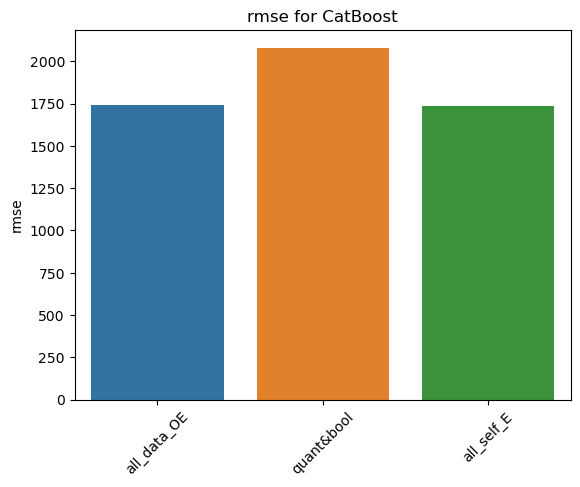

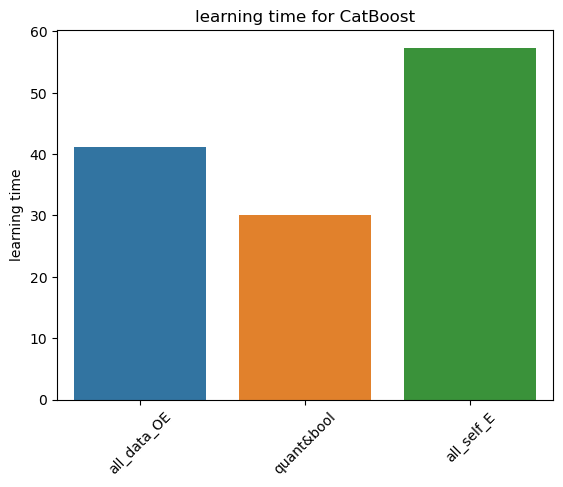

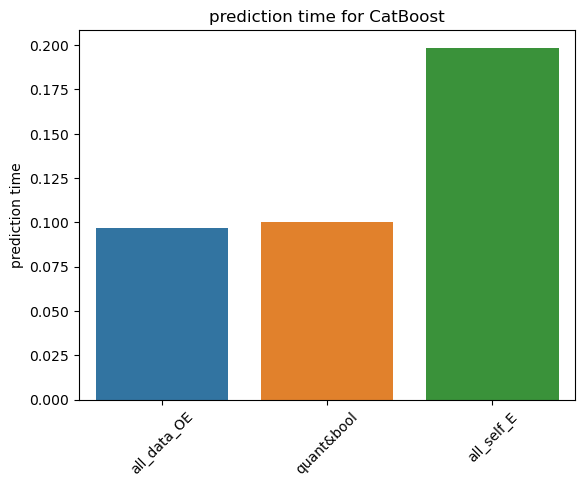

In [31]:
def visualization_models(name, models_indexes, xticks_list):
    sns.barplot(x = models_indexes, y = model_list['rmse'][models_indexes])
    plt.title(f'rmse for {name}')
    plt.ylabel('rmse')
    plt.xticks(ticks=[0, 1, 2], labels=xticks_list, rotation=45)
    plt.show()
    
    
    
    sns.barplot(x = models_indexes, y = model_list['learning_time'][models_indexes])
    plt.title(f'learning time for {name}')
    plt.ylabel('learning time')
    plt.xticks(ticks=[0, 1, 2], labels=xticks_list, rotation=45)
    plt.show()
    
    sns.barplot(x = models_indexes, y = model_list['prediction_time'][models_indexes])
    plt.title(f'prediction time for {name}')
    plt.ylabel('prediction time')
    plt.xticks(ticks=[0, 1, 2], labels=xticks_list, rotation=45)
    plt.show()
    

visualization_models('CatBoost', [10, 11, 12], ['all_data_OE', 'quant&bool', 'all_self_E'])

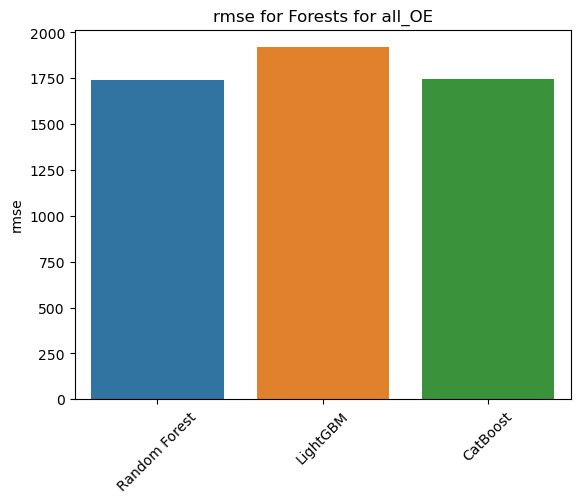

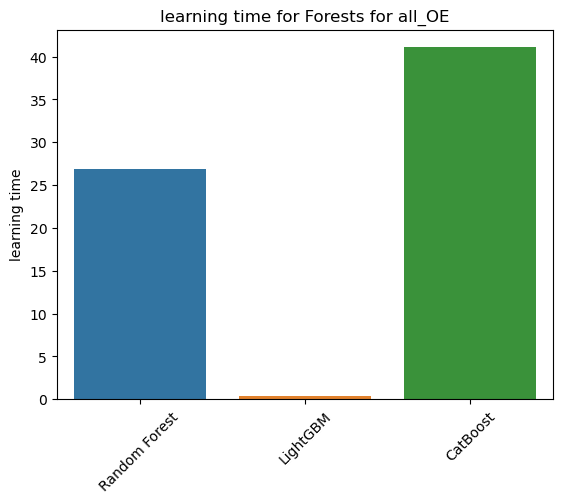

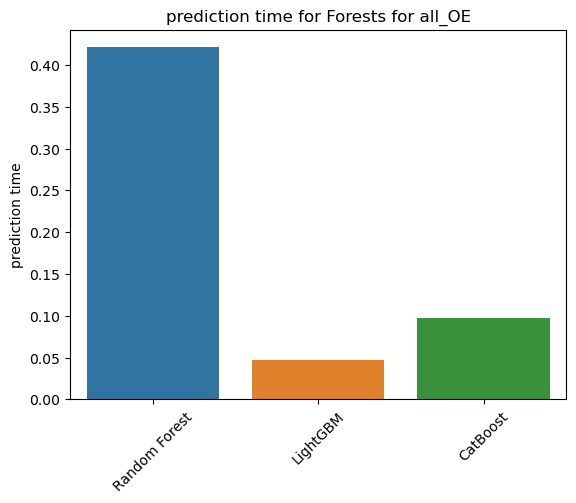

In [32]:
visualization_models('Forests for all_OE', [8, 7, 10], ['Random Forest', 'LightGBM', 'CatBoost'])

**Best model** should be discussed with the customer as many models fulfill the accuracy requirement.  
My choice of CatBoost on all data with self-coding is optimal. It gives the best accuracy, and with excellent prediction speed, although the training takes relatively long.

### Verification on a test sample

In [33]:
print('CatBoost on all data with encoding:')
start = time.time()
predictions = model_list['model'][12].predict(test_features)
end = time.time()
print('Prediction time on test sample:', (end - start)) 
 
rmse = give_me_RMSE(test_targets, predictions)
print('rmse on the test sample:', rmse)

CatBoost on all data with encoding:
Prediction time on test sample: 0.20389246940612793
rmse on the test sample: 1747.5846394810212


## Conclusions
**Preparation** The data were examined, duplicates and outliers were removed, missing values were filled in. Uninformative columns were removed. Some categorical attributes were coded. All together, the memory required to store the original data was reduced by more than half.
**Model training** A number of models were trained: dummy, linear regression, decision tree, random forest, as well as models using bousting: LightGBM, CatBoost. Hyperparameter search (simple for bousting models) was used, and data selection and coding was performed to see if all the data was needed for the models to work well, given the speed requirements of the client.
**Analysis of the models** Overall, all models performed well in prediction. Further choices can be discussed with the customer, namely whether speed or accuracy is more important. Currently the best model is recognized as CatBoost trained on all data with coding. It also perfectly coped with predictions on the test sample.